In [764]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [765]:
df = pd.read_csv('Salary.csv')

In [766]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [767]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 692.0 bytes


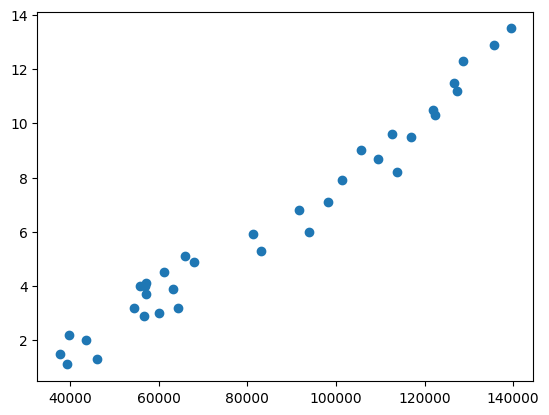

In [768]:
plt.scatter(x=df["Salary"],y=df["YearsExperience"])
plt.show()

In [769]:
from sklearn.model_selection import train_test_split
X = df.drop("Salary",axis=1)
y = df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
correlation = df.corr()
correlation["Salary"].sort_values(ascending=False)


Salary             1.000000
YearsExperience    0.982427
Name: Salary, dtype: float64

In [770]:
from sklearn.linear_model import LinearRegression

In [771]:
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

In [772]:
print("Intercept:", lin.intercept_)
print("Slope (Coefficient):", lin.coef_)

Intercept: 29078.626034406887
Slope (Coefficient): [8578.76747669]


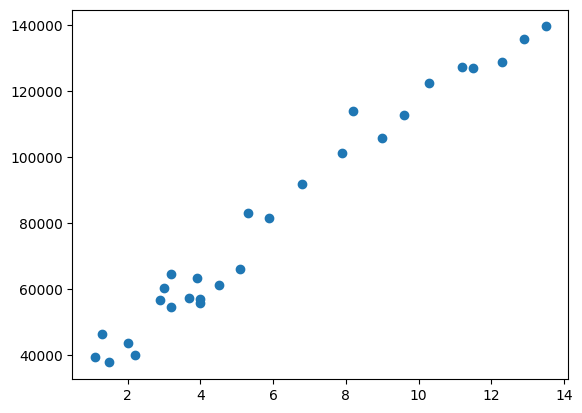

In [773]:
plt.scatter(x=X_train,y=y_train)
plt.show()

In [774]:
y_predict = lin.predict(X_test)
X_test

,YearsExperience
26,9.5
13,4.1
24,8.7
21,7.1
15,4.9
29,10.5
19,6.0


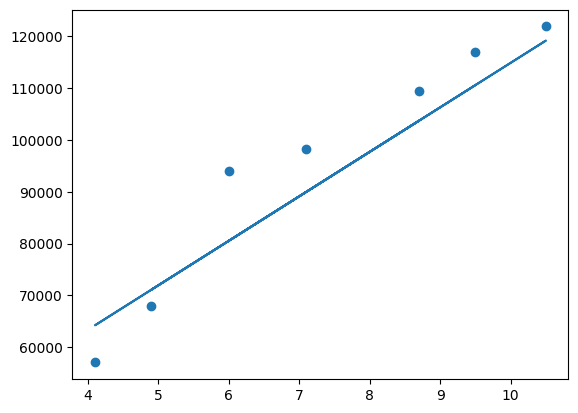

In [775]:
plt.plot(X_test,y_predict)
plt.scatter(X_test,y_test)
plt.show()

In [776]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(r2_score(y_test,y_predict))
print(mean_squared_error(y_test, y_predict))

0.8914234140042779
55761791.306260146


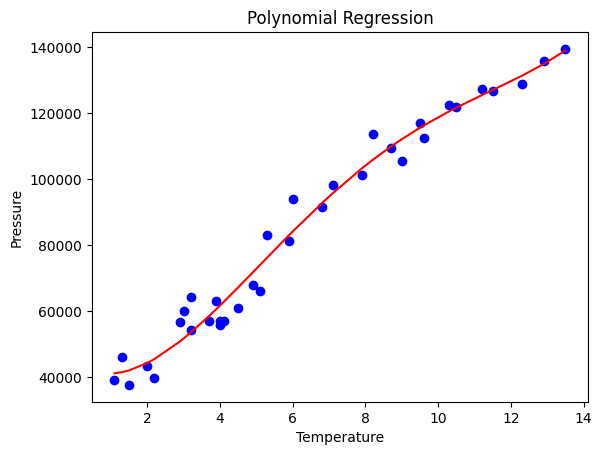

In [777]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
poly.fit(X_poly, y)
lin2 = LinearRegression() 
lin2.fit(X_poly, y)
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  
plt.show() 